In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gamma

import models

#### Prepare time

In [24]:
TIME_S = 0.155
TIME_F = 4
TIME_NO = 20

times = np.linspace(TIME_S, TIME_F, TIME_NO + 1)
print(times)

[0.155   0.34725 0.5395  0.73175 0.924   1.11625 1.3085  1.50075 1.693
 1.88525 2.0775  2.26975 2.462   2.65425 2.8465  3.03875 3.231   3.42325
 3.6155  3.80775 4.     ]


#### Cole-Cole model parameters

In [43]:
eta0 = 0.1 # charge
tau = 1 # time constant
c = 0.6  # frequency exponential

#### Calculate

In [26]:
eta = models.modelColeColeTD(times, eta0, tau, c)

#### Compute for timegate (???)

In [27]:
times_gate = (times + np.roll(times, 1)) / 2
times_gate = times_gate[1:]

eta_gate = (eta + np.roll(eta, 1)) / 2
eta_gate = eta_gate[1:]

In [28]:
times_gate

array([0.251125, 0.443375, 0.635625, 0.827875, 1.020125, 1.212375,
       1.404625, 1.596875, 1.789125, 1.981375, 2.173625, 2.365875,
       2.558125, 2.750375, 2.942625, 3.134875, 3.327125, 3.519375,
       3.711625, 3.903875])

In [29]:
eta_gate*1000

array([ 1.12902205e+02,  7.96458990e+01,  6.38497813e+01,  5.42452607e+01,
        4.76680981e+01,  4.28279856e+01,  3.90884965e+01,  3.60957035e+01,
        3.36355735e+01,  3.15703112e+01,  2.98064611e+01,  2.82751415e+01,
        2.68921928e+01,  2.53117355e+01,  2.13193882e+01,  9.12592764e-01,
       -1.08368141e+02, -6.76175860e+02, -3.50022689e+03, -1.45108458e+04])

#### Plot

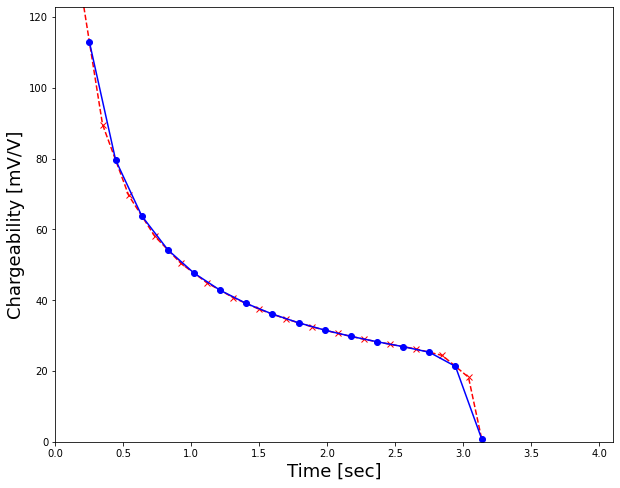

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(times, eta*1000,'--rx')
plt.plot(times_gate, eta_gate*1000,'-bo')
plt.xlabel('Time [sec]',fontsize = 18)
plt.ylabel('Chargeability [mV/V]',fontsize = 18)
plt.xlim([0, np.max(times_gate)+0.2])
plt.ylim([0, np.max(eta_gate)*1000+10])
plt.show()  

#### Save results to file

In [31]:
output = np.column_stack([np.arange(len(times_gate)), times_gate, eta_gate])
np.savetxt("sample.txt", output, fmt="%10.4f", delimiter=",")